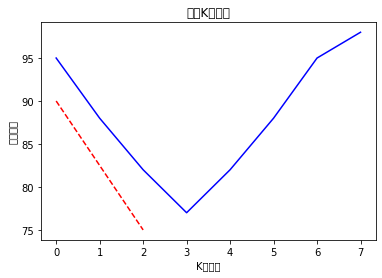

In [27]:
import plotly.graph_objects as go

# 假設有一組K棒資料，每個K棒的最低價格
lows = [95, 98, 98, 105, 102, 100, 105, 110, 108, 110, 112, 115, 116]

# 創建一個時間序列，從1開始進行編號
timestamps = list(range(1, len(lows) + 1))

# 進行線性回歸計算
slope, intercept = np.polyfit(timestamps, lows, 1)

# 趨勢線方程式：y = slope * x + intercept
trend_line = [slope * x + intercept for x in timestamps]

# 繪製K棒和趨勢線
fig = go.Figure()
fig.add_trace(go.Candlestick(x=timestamps, low=lows, name='K棒'))
fig.add_trace(go.Scatter(x=timestamps, y=trend_line, mode='lines', name='趨勢線'))

fig.update_layout(
    title='K棒與趨勢線',
    xaxis_title='時間序列',
    yaxis_title='最低價格'
)

fig.show()

In [35]:
class KBar:
    def __init__(self, high, date):
        self.high = high
        self.date = date

def find_trend_reversal(k_bars):
    trend_line = k_bars[0].high
    break_date = None

    for i in range(1, len(k_bars)):
        current_bar = k_bars[i]

        if current_bar.high > trend_line:
            if break_date is not None:
                return break_date

            trend_line = current_bar.high
        else:
            trend_line = current_bar.high
            break_date = current_bar.date

    return None

# 示例K棒数据
k_bars = [
    KBar(11.5, "2023-06-01"),
    KBar(11.4, "2023-06-02"),
    KBar(11.3, "2023-06-03"),
    KBar(11.3, "2023-06-04"),
    KBar(11.1, "2023-06-05"),
    KBar(10.7, "2023-06-06"),
    KBar(10.6, "2023-06-07"),
    KBar(10.3, "2023-06-08"),
    KBar(10.5, "2023-06-09"),
    KBar(11.6, "2023-06-10"),
]

# 查找趋势扭转突破日期
break_date = find_trend_reversal(k_bars)

if break_date is not None:
    print(f"趋势扭转突破日期：{break_date}")
else:
    print("未发生趋势扭转突破")


趋势扭转突破日期：2023-06-08


<function <lambda> at 0x000001DEC2A4F7F0>
[ 1  2  3  4  5  6  7  8  9 10]
斜率（slope）: -0.8060606060606061
截距（intercept）: 98.33333333333334
突破扭轉日期: Unknown


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

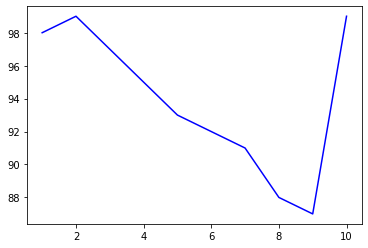

In [26]:
import numpy as np
from scipy import stats

# 假設有一組K棒資料，每個K棒的最低價格
lows = [98,99,97,95,93,92,91,88,87,99]

# 創建一個時間序列，從1開始進行編號
timestamps = np.arange(1, len(lows)+1)

# 進行線性回歸計算
slope, intercept, r_value, p_value, std_err = stats.linregress(timestamps, lows)

# 趨勢線方程式：y = slope * x + intercept
trend_line = lambda x: slope * x + intercept
print(trend_line)

# 計算突破扭轉的日期
break_date_index = np.argmax(lows > trend_line(timestamps))
print(timestamps)
break_date = "Unknown" if break_date_index == 0 else break_date_index + 1  # 將索引轉換為對應的日期

print("斜率（slope）:", slope)
print("截距（intercept）:", intercept)
print("突破扭轉日期:", break_date)

plt.plot(timestamps, lows, 'b-', label='K棒')
plt.plot(timestamps, trend_line, 'r-', label='趨勢線')
plt.title('K棒與趨勢線')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26834 (\N{CJK UNIFIED IDEOGRAPH-68D2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36264 (\N{CJK UNIFIED IDEOGRAPH-8DA8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21218 (\N{CJK UNIFIED IDEOGRAPH-52E2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32218 (\

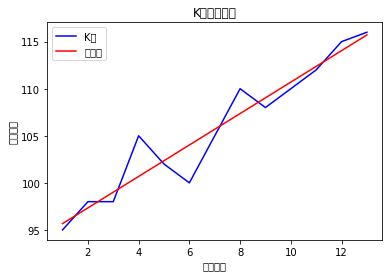

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 假設有一組K棒資料，每個K棒的最低價格
lows = [95, 98, 98, 105, 102, 100, 105, 110, 108, 110, 112, 115, 116]

# 創建一個時間序列，從1開始進行編號
timestamps = np.arange(1, len(lows) + 1)

# 進行線性回歸計算
slope, intercept = np.polyfit(timestamps, lows, 1)

# 趨勢線方程式：y = slope * x + intercept
trend_line = slope * timestamps + intercept

# 繪製趨勢線和K棒圖形
plt.plot(timestamps, lows, 'b-', label='K棒')
plt.plot(timestamps, trend_line, 'r-', label='趨勢線')
plt.xlabel('時間序列')
plt.ylabel('最低價格')
plt.title('K棒與趨勢線')
plt.legend()
plt.show()